# Loading the Data

In [8]:
# load data



# import the experiment utilities package
import exputils as eu
import numpy as np


# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()


display(experiment_data_loader)
experiment_data_loader.load_data()

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



Output()

# Plotting the Data

In [3]:
# experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/traitlets/traitlets.py:1387: DeprecationWarning: Passing unrecognized arguments to super(CodeProducerWidget).__init__(cildren=[]).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

Output()

## Mean value

In [2]:
## plotting
import numpy as np
import plotly.graph_objects as go


means = []
for mean_idx in range(100):
    if f"mean{mean_idx}" in raw_data:
        means.append(raw_data[f"mean{mean_idx}"])

    
data = np.stack(means, axis=1)
print(data.shape)

# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []
for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))

# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()



NameError: name 'raw_data' is not defined

## Var Values

In [8]:
### plot
import numpy as np
import plotly.graph_objects as go

means = []
for mean_idx in range(100):
    if f"std{mean_idx}" in raw_data:
        means.append(raw_data[f"std{mean_idx}"])

    
data = np.stack(means, axis=1)

# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []
for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))

# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [2]:
### plot
import numpy as np
import plotly.graph_objects as go

means = []
for mean_idx in range(100):
    if f"std{mean_idx}" in raw_data:
        means.append(raw_data[f"std{mean_idx}"])

    
data = np.stack(means, axis=1)

# Preparing data for plotting
epochs = np.arange(1, data.shape[0])
traces = []
for i in range(data.shape[1]):
    traces.append(go.Scatter(x=epochs, y=data[:, i], mode='lines', name=f'Value {i+1}'))

# Plotting with Plotly
layout = go.Layout(title='Change of 16 Values over 500 Steps',
                   xaxis=dict(title='Epoch'),
                   yaxis=dict(title='Value'),
                   template='plotly_dark')

fig = go.Figure(data=traces, layout=layout)
fig.show()

NameError: name 'raw_data' is not defined

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import traceback 
from scipy.stats import mannwhitneyu
import pandas as pd

dataset_names = ['noise']

method_grouping = {'svr': ['svr'],
 'pls': ['pls'],
 'gradboost': ['gradboost'],
 'mlp': ['mlp 0.01', 'mlp 0.001', 'mlp 0.0001'],
 'mrbf random': ['mrbf 0.01 rand',
  'mrbf 0.001 rand',
  'mrbf 0.0001 rand'],
 'mrbf fixed random': ['mrbf 0.01 fixed rand',
  'mrbf 0.001 fixed rand',
  'mrbf 0.0001 fixed rand'],
 'mrbf uniform': ['mrbf 0.01 uni',
  'mrbf 0.001 uni',
  'mrbf 0.0001 uni'],
 'mrbf fixed uniform': ['mrbf 0.01 fixed uni',
  'mrbf 0.001 fixed uni',
  'mrbf 0.0001 fixed uni'],
 'urbf random': ['urbf 0.01 rand',        
  'urbf 0.001 rand',
  'urbf 0.0001 rand'],
 'urbf fixed random':[
  'urbf 0.01 fixed rand',
  'urbf 0.001 fixed rand',
  'urbf 0.0001 fixed rand'],
  'mrbf fixed uniform': ['mrbf 0.01 fixed uni',
  'mrbf 0.001 fixed uni',
  'mrbf 0.0001 fixed uni'],
 'urbf uniform': ['urbf 0.01 uni',
  'urbf 0.001 uni',
  'urbf 0.0001 uni'],
 'urbf fixed uniform':[
  'urbf 0.01 fixed uni',
  'urbf 0.001 fixed uni',
  'urbf 0.0001 fixed uni'],
'ffn random': ['ffn_0.01_0.1 rand',
  'ffn_0.001_0.1 rand',
  'ffn_0.0001_0.1 rand',
  'ffn_0.01_1 rand',
  'ffn_0.001_1 rand',
  'ffn_0.0001_1 rand',
  'ffn_0.01_10 rand',
  'ffn_0.001_10 rand',
  'ffn_0.0001_10 rand'],
 'uffn random': ['uffn_0.01_0.1 rand',
  'uffn_0.001_0.1 rand',
  'uffn_0.0001_0.1 rand',
  'uffn_0.01_1 rand',
  'uffn_0.001_1 rand',
  'uffn_0.0001_1 rand',
  'uffn_0.01_10 rand',
  'uffn_0.001_10 rand',
  'uffn_0.0001_10 rand'],
'ffn uniform': ['ffn_0.01_0.1 uni',
  'ffn_0.001_0.1 uni',
  'ffn_0.0001_0.1 uni',
  'ffn_0.01_1 uni',
  'ffn_0.001_1 uni',
  'ffn_0.0001_1 uni',
  'ffn_0.01_10 uni',
  'ffn_0.001_10 uni',
  'ffn_0.0001_10 uni'],
 'uffn uniform': ['uffn_0.01_0.1 uni',
  'uffn_0.001_0.1 uni',
  'uffn_0.0001_0.1 uni',
  'uffn_0.01_1 uni',
  'uffn_0.001_1 uni',
  'uffn_0.0001_1 uni',
  'uffn_0.01_10 uni',
  'uffn_0.001_10 uni',
  'uffn_0.0001_10 uni'],}

method_names = [x
    for xs in list(method_grouping.values())
    for x in xs
]

print(len(method_names))

data = experiment_data_loader.experiment_data

_train_loss = {}
_test_loss = {}
_val_loss = {}

for method_id in list(data.keys()):
    method_data = data[method_id]['repetition_data']
    
    method_id = int(method_id)
    
    if method_id not in _train_loss:
        _train_loss[method_id] = []
        _test_loss[method_id] = []
        _val_loss[method_id] = []
    
    for rep_id in list(method_data.keys()):        
        _train_loss[method_id].append(method_data[rep_id]['train_loss'])
        _test_loss[method_id].append(method_data[rep_id]['test_loss'])
        _val_loss[method_id].append(method_data[rep_id]['val_loss'])
        
for key,val in _train_loss.items():
    try:
        _train_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass

for key,val in _test_loss.items():
    try:
        _test_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass
    
for key,val in _val_loss.items():
    try:
        _val_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass

train_loss = {
    dataset_names[0]:{},
}  

test_loss = {
    dataset_names[0]:{},
}  

val_loss = {
    dataset_names[0]:{},
}  

for key,val in _train_loss.items():
    dataset_key = dataset_names[0]
    
    method_key = method_names[key - 1]

    train_loss[dataset_key][method_key] = val

for key,val in _test_loss.items():
    dataset_key = dataset_names[0]
    
    method_key = method_names[key - 1]

    test_loss[dataset_key][method_key] = val
    
for key,val in _val_loss.items():
    dataset_key = dataset_names[0]
    
    method_key = method_names[key - 1]

    val_loss[dataset_key][method_key] = val
    

max_method_num = len(method_names)


min_val_test_loss_std = {}

min_test_loss = {}
min_val_test_loss = {}

p_test = {}


for method in method_names:
    for dataset in dataset_names:
        print(f"Analyzing: {dataset} {method}")
        
        if method not in train_loss[dataset]:
            continue
        
        try:
            rep_min_test_loss = np.min(test_loss[dataset][method],axis=0)
            idx_min_val_loss = np.argmin(val_loss[dataset][method],axis=0)
            

            if dataset not in min_test_loss:
                min_test_loss[dataset] = {}
                
            if dataset not in min_val_test_loss:
                min_val_test_loss[dataset] = {}
                min_val_test_loss_std[dataset] = {}
                p_test[dataset] = {}
                

            min_test_loss[dataset][method] = np.mean(rep_min_test_loss,axis=0)
            min_val_test_loss_std[dataset][method] = np.std(rep_min_test_loss,axis=0)

        
        
            _min_val_test_loss = []
            for rep,i in enumerate(idx_min_val_loss):
                _min_val_test_loss.append(test_loss[dataset][method][i,rep])
            
            min_val_test_loss[dataset][method] = np.mean(_min_val_test_loss)
            min_val_test_loss_std[dataset][method] = np.std(_min_val_test_loss)
            
            p_test[dataset][method] = {}
            
            for compare_method in method_names:
                
                compare_min_val_test_loss = []
                for rep,i in enumerate(idx_min_val_loss):
                    compare_min_val_test_loss.append(test_loss[dataset][compare_method][i,rep])
                    
                #print(len(_min_val_test_loss))

                U1, p = mannwhitneyu(compare_min_val_test_loss, _min_val_test_loss, method="exact")
                p_test[dataset][method][compare_method] = p
                
            
        except: 
            traceback.print_exc() 

            
p_df = pd.DataFrame.from_dict(p_test['noise'], orient='index')


### Calculate with reference to specific method
reference_method = method_names[2]

# Calculate relative min test loss
relative_min_test_loss = {}
relative_min_val_test_loss = {}

for dataset_name, dataset_vals in min_test_loss.items():
    relative_min_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}

for dataset_name, dataset_vals in min_val_test_loss.items():    
    relative_min_val_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}    

    
print(relative_min_val_test_loss)
p_df

66
Analyzing: noise svr
Analyzing: noise pls
Analyzing: noise gradboost
Analyzing: noise mlp 0.01
Analyzing: noise mlp 0.001
Analyzing: noise mlp 0.0001
Analyzing: noise mrbf 0.01 rand
Analyzing: noise mrbf 0.001 rand
Analyzing: noise mrbf 0.0001 rand
Analyzing: noise mrbf 0.01 fixed rand
Analyzing: noise mrbf 0.001 fixed rand
Analyzing: noise mrbf 0.0001 fixed rand
Analyzing: noise mrbf 0.01 uni
Analyzing: noise mrbf 0.001 uni
Analyzing: noise mrbf 0.0001 uni
Analyzing: noise mrbf 0.01 fixed uni
Analyzing: noise mrbf 0.001 fixed uni
Analyzing: noise mrbf 0.0001 fixed uni
Analyzing: noise urbf 0.01 rand
Analyzing: noise urbf 0.001 rand
Analyzing: noise urbf 0.0001 rand
Analyzing: noise urbf 0.01 fixed rand
Analyzing: noise urbf 0.001 fixed rand
Analyzing: noise urbf 0.0001 fixed rand
Analyzing: noise urbf 0.01 uni
Analyzing: noise urbf 0.001 uni
Analyzing: noise urbf 0.0001 uni
Analyzing: noise urbf 0.01 fixed uni
Analyzing: noise urbf 0.001 fixed uni
Analyzing: noise urbf 0.0001 fixed

svr       pls  gradboost  mlp 0.01  mlp 0.001  \
svr                 1.000000  0.645377   0.000155  0.328205   0.328205   
pls                 0.645377  1.000000   0.000155  0.505361   0.505361   
gradboost           0.000155  0.000155   1.000000  0.000155   0.000155   
mlp 0.01            0.000155  0.000155   0.441803  1.000000   0.028127   
mlp 0.001           0.001865  0.001865   0.082984  0.028127   1.000000   
...                      ...       ...        ...       ...        ...   
uffn_0.001_1 uni    0.000155  0.000155   0.798446  0.959130   0.049883   
uffn_0.0001_1 uni   0.082984  0.064957   0.001088  0.000311   0.064957   
uffn_0.01_10 uni    0.382284  0.328205   0.028127  0.441803   0.878477   
uffn_0.001_10 uni   0.104895  0.082984   0.001088  0.020668   0.720901   
uffn_0.0001_10 uni  0.645377  0.441803   0.000622  0.000155   0.049883   

                    mlp 0.0001  mrbf 0.01 rand  mrbf 0.001 rand  \
svr                   0.328205        0.328205         0.328205   
pls                   0.505361        0.505361         0.505361   
gradboost             0.000155        0.000155         0.000155   
mlp 0.01              0.000155        0.049883         0.000155   
mlp 0.001             0.001865        0.798446         0.010412   
...                        ...             ...              ...   
uffn_0.001_1 uni      0.000155        0.049883         0.000155   
uffn_0.0001_1 uni     0.104895        0.049883         0.278632   
uffn_0.01_10 uni      0.328205        0.798446         0.441803   
uffn_0.001_10 uni     0.064957        0.573737         0.082984   
uffn_0.0001_10 uni    0.505361        0.014763         0.798446   

                    mrbf 0.0001 rand  mrbf 0.01 fixed rand  ...  \
svr                         0.328205              0.328205  ...   
pls                         0.505361              0.505361  ...   
gradboost                   0.000155              0.000155  ...   
mlp 0.01                    0.000155              0.000155  ...   
mlp 0.001                   0.001865              0.004662  ...   
...                              ...                   ...  ...   
uffn_0.001_1 uni            0.000155              0.000155  ...   
uffn_0.0001_1 uni           0.049883              0.104895  ...   
uffn_0.01_10 uni            0.328205              0.328205  ...   
uffn_0.001_10 uni           0.064957              0.082984  ...   
uffn_0.0001_10 uni          0.441803              0.798446  ...   

                    ffn_0.0001_10 uni  uffn_0.01_0.1 uni  uffn_0.001_0.1 uni  \
svr                          0.328205           0.328205            0.328205   
pls                          0.505361           0.505361            0.505361   
gradboost                    0.000155           0.000155            0.000155   
mlp 0.01                     0.000155           0.010412            0.006993   
mlp 0.001                    0.000311           0.573737            0.328205   
...                               ...                ...                 ...   
uffn_0.001_1 uni             0.000155           0.020668            0.010412   
uffn_0.0001_1 uni            0.010412           0.505361            0.720901   
uffn_0.01_10 uni             0.278632           0.645377            0.798446   
uffn_0.001_10 uni            0.049883           0.720901            0.959130   
uffn_0.0001_10 uni           0.064957           0.278632            0.278632   

                    uffn_0.0001_0.1 uni  uffn_0.01_1 uni  uffn_0.001_1 uni  \
svr                            0.328205         0.328205          0.328205   
pls                            0.505361         0.505361          0.505361   
gradboost                      0.000155         0.000155          0.000155   
mlp 0.01                       0.000155         0.720901          0.798446   
mlp 0.001                      0.002953         0.020668          0.082984   
...                                 ...              ...               ...   
uffn_0.001_1 uni   

In [4]:
import plotly.graph_objects as go
import plotly.express as px

colors = px.colors.qualitative.Plotly

colors = [*colors,*colors,*colors,*colors]

dataset_names = list(min_test_loss.keys())

for dataset_name in dataset_names:
    # Extract methods and corresponding test losses for the current dataset
    methods = list(min_test_loss[dataset_name].keys())
    test_losses = [min_test_loss[dataset_name][method] for method in methods]

    # Create a bar chart for the current dataset
    fig = go.Figure(data=[
        go.Bar(
            x=methods,
            y=test_losses,
            name=dataset_name,
            marker_color=colors[:len(methods)]  # Assign different colors to each bar
        )
    ])

    print(methods)
    
    # Customize the layout
    fig.update_layout(
        title=f'Relative Min Test Loss by Method for {dataset_name}',
        xaxis=dict(
            title='Method',
            #tickmode='array',
            #tickvals=list(range(len(methods))),
            #ticktext=methods
        ),
        yaxis=dict(
            title='Relative Min Test Loss'
        ),
        legend_title=dataset_name
        # Additional customizations can be added here
    )

    # Show the plot
    fig.show()

['svr', 'pls', 'gradboost', 'mlp 0.01', 'mlp 0.001', 'mlp 0.0001', 'mrbf 0.01 rand', 'mrbf 0.001 rand', 'mrbf 0.0001 rand', 'mrbf 0.01 fixed rand', 'mrbf 0.001 fixed rand', 'mrbf 0.0001 fixed rand', 'mrbf 0.01 uni', 'mrbf 0.001 uni', 'mrbf 0.0001 uni', 'mrbf 0.01 fixed uni', 'mrbf 0.001 fixed uni', 'mrbf 0.0001 fixed uni', 'urbf 0.01 rand', 'urbf 0.001 rand', 'urbf 0.0001 rand', 'urbf 0.01 fixed rand', 'urbf 0.001 fixed rand', 'urbf 0.0001 fixed rand', 'urbf 0.01 uni', 'urbf 0.001 uni', 'urbf 0.0001 uni', 'urbf 0.01 fixed uni', 'urbf 0.001 fixed uni', 'urbf 0.0001 fixed uni', 'ffn_0.01_0.1 rand', 'ffn_0.001_0.1 rand', 'ffn_0.0001_0.1 rand', 'ffn_0.01_1 rand', 'ffn_0.001_1 rand', 'ffn_0.0001_1 rand', 'ffn_0.01_10 rand', 'ffn_0.001_10 rand', 'ffn_0.0001_10 rand', 'uffn_0.01_0.1 rand', 'uffn_0.001_0.1 rand', 'uffn_0.0001_0.1 rand', 'uffn_0.01_1 rand', 'uffn_0.001_1 rand', 'uffn_0.0001_1 rand', 'uffn_0.01_10 rand', 'uffn_0.001_10 rand', 'uffn_0.0001_10 rand', 'ffn_0.01_0.1 uni', 'ffn_0.001

In [5]:
import pandas as pd

# Prepare the data for DataFrame
data_for_df = {}

# Assuming you have a way to access the standard deviations, similar to how you access the min_val_test_loss
# For illustration, let's assume a similar structure for standard deviations: std_val_test_loss[dataset][method]

for index, method in enumerate(method_names):
    losses = []
    std_devs = []
    for dataset in dataset_names:
        # Retrieve the minimum loss
        loss = min_val_test_loss[dataset].get(method, None)
        # Retrieve the standard deviation, replace this with your actual data retrieval
        std_dev = min_val_test_loss_std[dataset].get(method, None)  # Placeholder for standard deviation data retrieval
        
        # Append the loss and standard deviation to the lists
        losses.append(loss)
        std_devs.append(std_dev)
    
    # Store losses and standard deviations in the DataFrame preparation dictionary
    data_for_df[method + '_loss'] = losses
    data_for_df[method + '_std'] = std_devs

# Create the DataFrame with an index for each dataset
df = pd.DataFrame(data_for_df, index=dataset_names)

df

svr_loss     svr_std     pls_loss     pls_std  gradboost_loss  \
noise  1315.231675  375.725442  1350.166613  361.508018      556.833245   

       gradboost_std  mlp 0.01_loss  mlp 0.01_std  mlp 0.001_loss  \
noise     182.660341     428.710098    217.963413      766.763371   

       mlp 0.001_std  ...  uffn_0.001_1 uni_loss  uffn_0.001_1 uni_std  \
noise     255.093352  ...             443.091346            236.947511   

       uffn_0.0001_1 uni_loss  uffn_0.0001_1 uni_std  uffn_0.01_10 uni_loss  \
noise             1091.027702             340.448577            1099.920628   

       uffn_0.01_10 uni_std  uffn_0.001_10 uni_loss  uffn_0.001_10 uni_std  \
noise            413.732467             1010.343056             213.693258   

       uffn_0.0001_10 uni_loss  uffn_0.0001_10 uni_std  
noise              1173.198074              288.178969  

[1 rows x 132 columns]

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_42436/3221050712.py:51: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



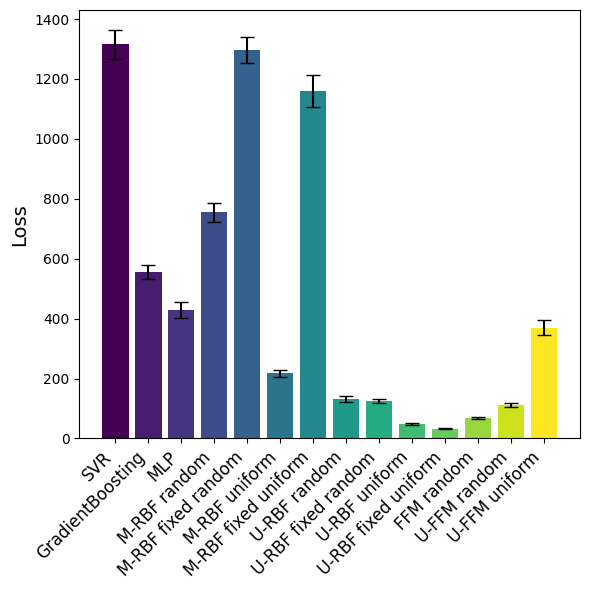

In [16]:

import matplotlib.cm as cm

method_dict = method_grouping


# Prepare the data for the new DataFrame with standard deviations included
data_for_reduced_df = {group: {'min_values': [], 'std_devs': []} for group in method_dict}

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    for group, methods in method_dict.items():
        group_values = [row[method + '_loss'] for method in methods if method + '_loss' in row]  # Use '_loss' to access loss values
        group_std_devs = [row[method + '_std'] for method in methods if method + '_std' in row]  # Use '_std' to access std deviation
        
        # Calculate the minimum value and standard deviation for this group, if there are any values
        min_value = min(group_values) if group_values else None
        
        min_arg = np.argmin(group_values) if group_values else None
        
        std_dev = group_std_devs[min_arg]#(sum(group_std_devs) / len(group_std_devs)) if group_std_devs else None  # Example calculation
        
        data_for_reduced_df[group]['min_values'].append(min_value)
        data_for_reduced_df[group]['std_devs'].append(std_dev)

# Transform the prepared data into a format suitable for the DataFrame
reformed_data = {}
for group, values in data_for_reduced_df.items():
    reformed_data[group + '_min'] = values['min_values']
    reformed_data[group + '_std'] = values['std_devs']

# Create the new reduced DataFrame
reduced_df = pd.DataFrame(reformed_data, index=df.index)
reduced_df = reduced_df.drop(['ffn uniform_min','ffn uniform_std','pls_min','pls_std'], axis=1) ### Since is actually not implemented and is the same as ffn rand. for multivariate case the uniform initialization is currently not possible
reduced_df.columns = [col.replace('mrbf', 'M-RBF').replace('urbf', 'U-RBF').replace('svr', 'SVR').replace('mlp', 'MLP').replace('gradboost', 'GradientBoosting').replace('fixed', 'fixed').replace('uffn', 'U-FFM').replace('ffn', 'FFM') for col in reduced_df.columns]

import matplotlib.pyplot as plt

# Assuming reduced_df now has '_min' and '_std' suffixes for each method group
plot_data = reduced_df[[col for col in reduced_df.columns if '_min' in col]]
std_devs = reduced_df[[col for col in reduced_df.columns if '_std' in col]]


values = plot_data.iloc[0].values  # Assuming a single row of data
errors = std_devs.iloc[0].values/8  # Matching standard deviations

# Method names for x-tick labels
methods = [col.replace('_min', '') for col in plot_data.columns]# plot_data.columns


# Generate a color map
color_map = cm.get_cmap('viridis', len(methods))

# Generate colors from the color map
colors = [color_map(i) for i in range(len(methods))]


# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ind = np.arange(len(methods))  # the x locations for the groups
width = 0.8  # the width of the bars

# Plot bars
ax.bar(ind, values, width, yerr=errors, capsize=5,color=colors, label='Loss')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Loss',fontsize=14)
#ax.set_xlabel('Methods')
ax.set_xticks(ind)
ax.set_xticklabels(methods, rotation=45, ha="right")

# Set the font size for x-tick labels
ax.tick_params(axis='x', labelsize=12)  # Set x-tick label font size to 14


plt.tight_layout()
plt.savefig("../../../assets/white_noise_performance.pdf", format="pdf", bbox_inches='tight')
plt.show()

           SVR_min     SVR_std  GradientBoosting_min  GradientBoosting_std  \
noise  1315.231675  375.725442            556.833245            182.660341   

          MLP_min     MLP_std  M-RBF random_min  M-RBF random_std  \
noise  428.710098  217.963413        755.508419         252.51294   

       M-RBF fixed random_min  M-RBF fixed random_std  ...  U-RBF uniform_min  \
noise             1296.815048               345.62117  ...          49.017667   

       U-RBF uniform_std  U-RBF fixed uniform_min  U-RBF fixed uniform_std  \
noise          19.942956                32.285196                10.777043   

       FFM random_min  FFM random_std  U-FFM random_min  U-FFM random_std  \
noise       68.480266       38.243348         110.64263         52.693235   

       U-FFM uniform_min  U-FFM uniform_std  
noise         370.465672         199.554256  

[1 rows x 28 columns]


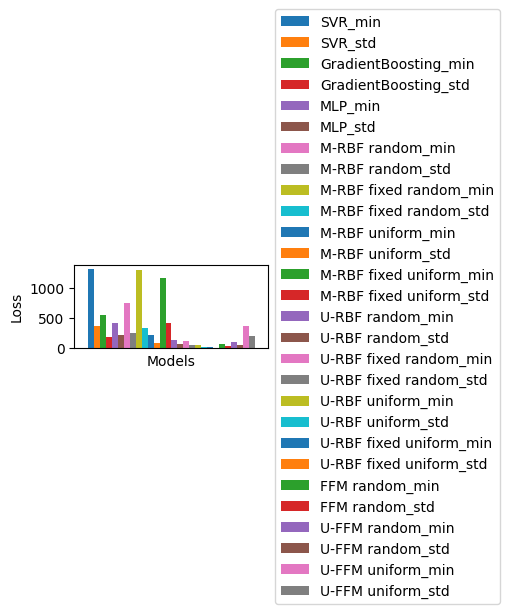

SVR_min     SVR_std  GradientBoosting_min  GradientBoosting_std  \
noise  1315.231675  375.725442            556.833245            182.660341   

          MLP_min     MLP_std  M-RBF random_min  M-RBF random_std  \
noise  428.710098  217.963413        755.508419         252.51294   

       M-RBF fixed random_min  M-RBF fixed random_std  ...  U-RBF uniform_min  \
noise             1296.815048               345.62117  ...          49.017667   

       U-RBF uniform_std  U-RBF fixed uniform_min  U-RBF fixed uniform_std  \
noise          19.942956                32.285196                10.777043   

       FFM random_min  FFM random_std  U-FFM random_min  U-FFM random_std  \
noise       68.480266       38.243348         110.64263         52.693235   

       U-FFM uniform_min  U-FFM uniform_std  
noise         370.465672         199.554256  

[1 rows x 28 columns]

In [10]:
import pandas as pd


f = plt.figure()

print(reduced_df)

reduced_df.plot(kind='bar', ax=f.gca(),figsize=(5, 4),width = 3)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # This will fit the plot more tightly to reduce excess space

plt.ylabel('Loss')
plt.xlabel('Models')
plt.xticks([])

#plt.savefig("../../../assets/white_noise_performance.pdf", format="pdf", bbox_inches='tight')


plt.show()

reduced_df

In [8]:
print(reduced_df.style.format( precision=2).highlight_min(axis=1, props="textbf:--rwrap;").to_latex())

\begin{tabular}{lrrrrrrrrrrrrrr}
 & svr & gradboost & mlp & mrbf random & mrbf fixed random & mrbf uniform & mrbf fixed uniform & urbf random & urbf fixed random & urbf uniform & urbf fixed uniform & ffn random & uffn random & uffn uniform \\
noise & 1489.38 & 634.03 & 451.60 & 635.27 & 1429.98 & 240.24 & 1338.02 & 93.68 & 1433.59 & 46.87 & \textbf{36.90} & 65.05 & 122.98 & 902.88 \\
\end{tabular}



Randomly generated mean: [[0.25799884 0.21672976]
 [0.48664804 0.58211246]
 [0.78307176 0.36538582]
 [0.92241167 0.26204881]] [(0, 1), (0, 1)]
Randomly generated stds: [0.70280505 0.71764607 0.69821708 0.98697348]
Randomly generated coef: [[0.80770754 0.59593906]
 [0.21083474 0.66573747]
 [0.20861892 0.43107081]
 [0.20383091 0.27662648]] [(0, 1), (0, 1)]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(10000, 2)


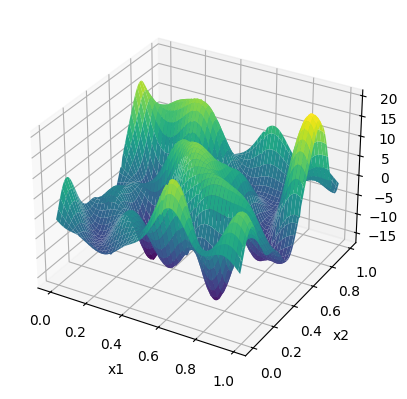

In [11]:
from function_regression.data_regression_experiment import sample_random_arrays
from function_regression.function_regression_experiment import run_experiment
from function_regression.functions.gaussian_mixture_function import GaussianMixtureFunction
from function_regression.functions.polynomial_function import PolynomialFunction
from function_regression.functions.michalewicz_function import MichalewiczFunction
import torch
from function_regression.models.urbf_mlp import URBFMLP
from function_regression.sgd_trainer import SGDTrainer
import numpy as np
import exputils as eu
import function_regression
import matplotlib.pyplot as plt

config = eu.AttrDict(
    # random seed for the repetition
    seed = 1234 + 2,

    model = eu.AttrDict(
        cls=function_regression.models.URBFMLP,
        hidden_features=[16,16,32,16,8],
        use_urbf=True,
        ranges=(-2,2),
        use_split_merge=False,
        split_merge_temperature=0.1,
        use_back_tray=False,
        back_tray_ratio = 0.5,
        use_adaptive_range = True,
    ),

    function = eu.AttrDict(
        cls=function_regression.functions.WhiteNoiseFunction,
        difficulty=4,
        in_features=2,
        ranges=(0,1),
        peak_distr_ranges = (0,1),
        sample_rates = [100]
    ),
    
    trainer = eu.AttrDict(
        cls=function_regression.SGDTrainer,
        learning_rate=0.1,
        urbf_learning_rate=1,
        n_epochs=1000,
        batch_size=64,
        device="cpu"
    ),
)


# define the default configuration
default_config = eu.AttrDict(
    model = eu.AttrDict(cls=URBFMLP),
    function = eu.AttrDict(
        cls=GaussianMixtureFunction,
        in_features=2,
        difficulty=1,
        ranges=[(-10,10),(-10,10)],),
    trainer = eu.AttrDict(cls=SGDTrainer),
    seed = 123,
    test_split_size = 0.2,
    val_split_size = 0.2,
    log_to_tensorboard = True,
)

# set the config based on the default config, given config, and the given function arguments
config = eu.combine_dicts( config, default_config)

### Sanitize
if isinstance(config.function.ranges,tuple):
    config.function.ranges = [config.function.ranges] * config.function.in_features        

### Sanitize
if isinstance(config.function.peak_distr_ranges,tuple):
    config.function.peak_distr_ranges = [config.function.peak_distr_ranges] * config.function.in_features        




# set random seeds with seed defined in the config
eu.misc.seed(config)

if "means" not in config.function:
    config.function.means = sample_random_arrays(config.function.difficulty, config.function.peak_distr_ranges)
    print(f"Randomly generated mean: {config.function.means} {config.function.peak_distr_ranges}")

if "stds" not in config.function:
    config.function.stds = np.squeeze(sample_random_arrays(config.function.difficulty,[(0.5,1)]), axis=1)
    print(f"Randomly generated stds: {config.function.stds}")

if "coef" not in config.function:
    config.function.coef = sample_random_arrays(config.function.difficulty, config.function.peak_distr_ranges)
    print(f"Randomly generated coef: {config.function.coef} {config.function.peak_distr_ranges}")

##
function = eu.misc.create_object_from_config(config.function)

function.plot_matplt(title=None, showcolorbar=False,save_as="../../../assets/white_noise_sample.pdf")

#model =  eu.misc.create_object_from_config(config.model)

132
36
Index(['ffn_0.01_0.1 rand', 'ffn_0.001_0.1 rand', 'ffn_0.0001_0.1 rand',
       'ffn_0.01_1 rand', 'ffn_0.001_1 rand', 'ffn_0.0001_1 rand',
       'ffn_0.01_10 rand', 'ffn_0.001_10 rand', 'ffn_0.0001_10 rand',
       'uffn_0.01_0.1 rand', 'uffn_0.001_0.1 rand', 'uffn_0.0001_0.1 rand',
       'uffn_0.01_1 rand', 'uffn_0.001_1 rand', 'uffn_0.0001_1 rand',
       'uffn_0.01_10 rand', 'uffn_0.001_10 rand', 'uffn_0.0001_10 rand',
       'ffn_0.01_0.1 uni', 'ffn_0.001_0.1 uni', 'ffn_0.0001_0.1 uni',
       'ffn_0.01_1 uni', 'ffn_0.001_1 uni', 'ffn_0.0001_1 uni',
       'ffn_0.01_10 uni', 'ffn_0.001_10 uni', 'ffn_0.0001_10 uni',
       'uffn_0.01_0.1 uni', 'uffn_0.001_0.1 uni', 'uffn_0.0001_0.1 uni',
       'uffn_0.01_1 uni', 'uffn_0.001_1 uni', 'uffn_0.0001_1 uni',
       'uffn_0.01_10 uni', 'uffn_0.001_10 uni', 'uffn_0.0001_10 uni'],
      dtype='object')
<class 'list'>
36
36
Index(['ffn_0.01  rand', 'ffn_0.001  rand', 'ffn_0.0001  rand',
       'ffn_0.01  rand', 'ffn_0.001  rand', '

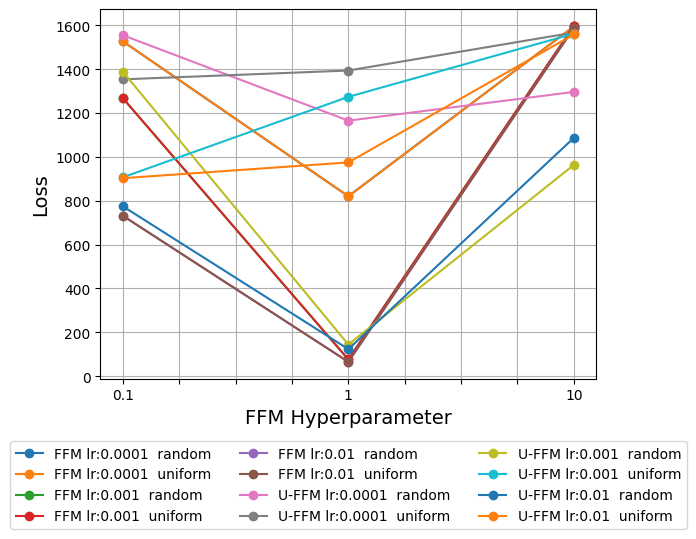

In [35]:

print(len(df.columns))

# Filter out columns that are not 'ffn' or 'uffn'
filtered_df = df.filter(regex=r'^(ffn|uffn)_')
filtered_df = filtered_df.filter(regex=r'loss')

for col in filtered_df.columns:
    filtered_df = filtered_df.rename(columns={col: col[:-5]})



print(len(filtered_df.columns))
print(filtered_df.columns)
# Extract the frequency and the rest of the name
frequency = filtered_df.columns.str.extract(r'_(0\.1|1|10)\s?(rand|uni)?$')[0]
rest_of_name = filtered_df.columns.str.replace(r'_(0\.1|10|1)', ' ', regex=True)
#print(rest_of_name)


#rest_of_name = rest_of_name.replace("loss","")

print( type(filtered_df.iloc[0].tolist()))
print(len(frequency))
print(len(rest_of_name))

#rest_of_name = [name.strip("_loss") for name in rest_of_name]

print(rest_of_name)
# Combine frequency and rest_of_name into a DataFrame
new_df_data = {'Name': rest_of_name, 'Frequency': frequency, 'Value': filtered_df.iloc[0].tolist()}
new_df = pd.DataFrame(new_df_data)

print(new_df)

# Pivot the DataFrame to get frequencies as columns and the rest as rows
final_df = new_df.pivot(index='Name', columns='Frequency', values='Value')

final_df = final_df.T

final_df.columns = [col.replace('uffn', 'U-FFM').replace('ffn', 'FFM').replace('_', ' lr:').replace('rand', 'random').replace('uni', 'uniform') for col in final_df.columns]


# Resulting DataFrame
print(final_df)



# Plotting using pandas built-in function
ax = final_df.plot(kind='line', marker='o')
ax.set_xlabel('FFM Hyperparameter',fontsize=14)
ax.set_ylabel('Loss',fontsize=14)
#ax.set_title('FFM Hyperparameter Sweep')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#ax.legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.savefig("../../../assets/ffm_hyperparameter_sweep.pdf", format="pdf", bbox_inches='tight')

plt.grid(True)
plt.show()